# Problem 1: Generating and Plotting a Synthetic Distribution

## Steps
1. Produce a synthetic dataset by plotting at least 300 points generated by a random number generator of our choice.
2. Plot this dataset as a histogram.
3. Label the histogram with the mean and median of the dataset.

## Method
1. In producing the dataset, use NumPy's random module.
2. In the solution, compute the mean and median of the dataset using functions in the NumPy module.
3. Plot histogram with beautiful labels using Matplotlib.
4. Annotate lines in the plot, and draw the mean and median in a neat and professional plot.

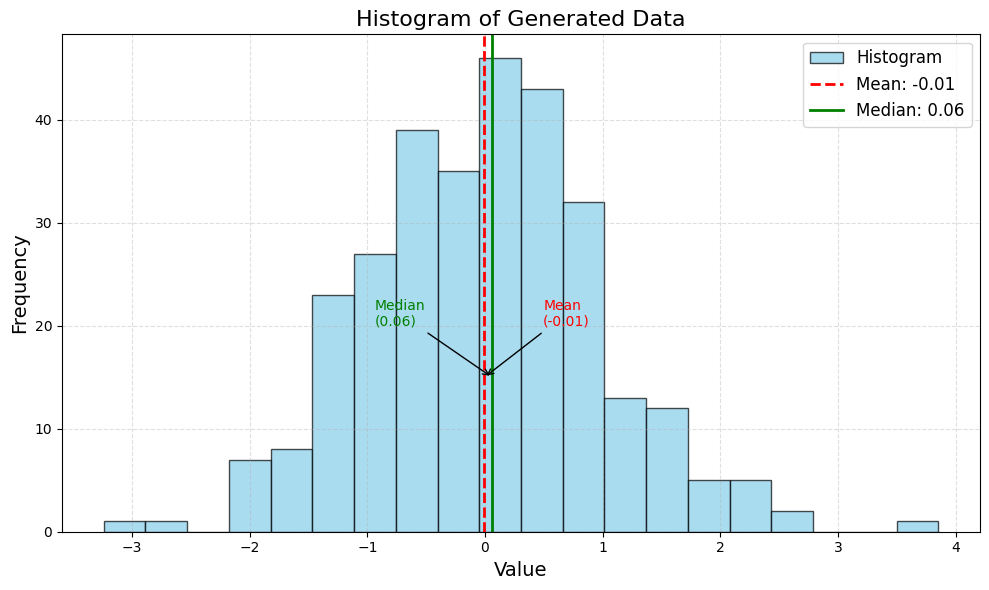

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate artificial data
np.random.seed(42)  # Ensuring reproducibility
data = np.random.normal(loc=0, scale=1, size=300)  # Draw 300 points from a normal distribution

# Step 2: Compute statistics
mean_val = np.mean(data)
median_val = np.median(data)

# Step 3: Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')

# Step 4: Add annotations for mean and median
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')
plt.annotate(f'Mean\n({mean_val:.2f})', xy=(mean_val, 15), xytext=(mean_val + 0.5, 20),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=10, color='red')
plt.annotate(f'Median\n({median_val:.2f})', xy=(median_val, 15), xytext=(median_val - 1, 20),
             arrowprops=dict(facecolor='green', arrowstyle='->'), fontsize=10, color='green')

# Step 5: Enhance aesthetics
plt.title('Histogram of Generated Data', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4, linestyle='--')

# Step 6: Display the plot
plt.tight_layout()
plt.show()


Explanation
Data Generation:

A normal distribution with mean 
0
0 and standard deviation 
1
1 is used.
np.random.seed(42) : consistent results when re-running the code.
    
Statistics:
Mean and median are calculated using NumPy functions.
Visualization:

The histogram uses 20 bins and semi-transparent sky-blue color for clarity.
Vertical lines for mean and median help distinguish the two statistics.
Annotations with arrows provide additional insight.

Style:
Fonts, colors, and grid lines are chosen for a polished appearance.

# Problem 2: Loading and Visualizing Parquet Data

## Objective:
1. Load the Parquet file from the given URL into Python.
2. Explore the dataset to understand its structure, content, and insights.
3. Visualize the data using elegant and appropriate plots.
4. Provide observations based on the visualizations to fully present the data.

## Approach:
- Use `pandas` to read the Parquet file directly from the URL.
- Examine the dataset's structure, columns, and basic statistics.
- Create multiple plots (histograms, scatter plots, bar plots, etc.) to represent the data comprehensively.

## Key Tools:
- Libraries: `pandas`, `matplotlib`, `and `pyarrow`
- Visualization Types: Histograms, pair plots, box plots, scatter plots, etc.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the CSV file locally
data = pd.read_csv('exercises_problem2.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())  # Check structure and column types
print("\nSample Data:")
print(data.head())  # Preview the first few rows


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
None

Sample Data:
       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0


In [4]:
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))

# Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Identify numerical and categorical columns
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("\nNumerical Columns:", numerical_columns.tolist())
print("Categorical Columns:", categorical_columns.tolist())



Summary Statistics:
             var1        var2        var3       class
count  400.000000  400.000000  400.000000  400.000000
mean     3.469246    2.576392    6.045638    0.627500
std      3.811159    0.533500    4.219296    0.484076
min     -5.577154    0.444386   -5.132768    0.000000
25%      0.068847    2.346191    2.419225    0.000000
50%      4.968903    2.708548    7.961119    1.000000
75%      7.025826    2.951366    9.840901    1.000000
max      9.425215    3.471373   12.048517    1.000000

Missing Values per Column:
var1     0
var2     0
var3     0
class    0
dtype: int64

Numerical Columns: ['var1', 'var2', 'var3', 'class']
Categorical Columns: []


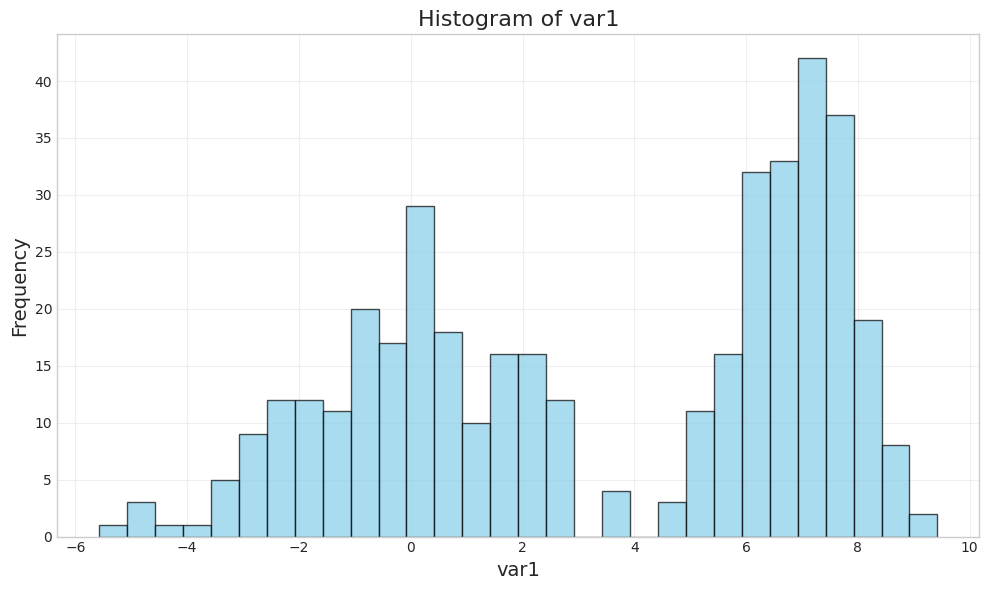

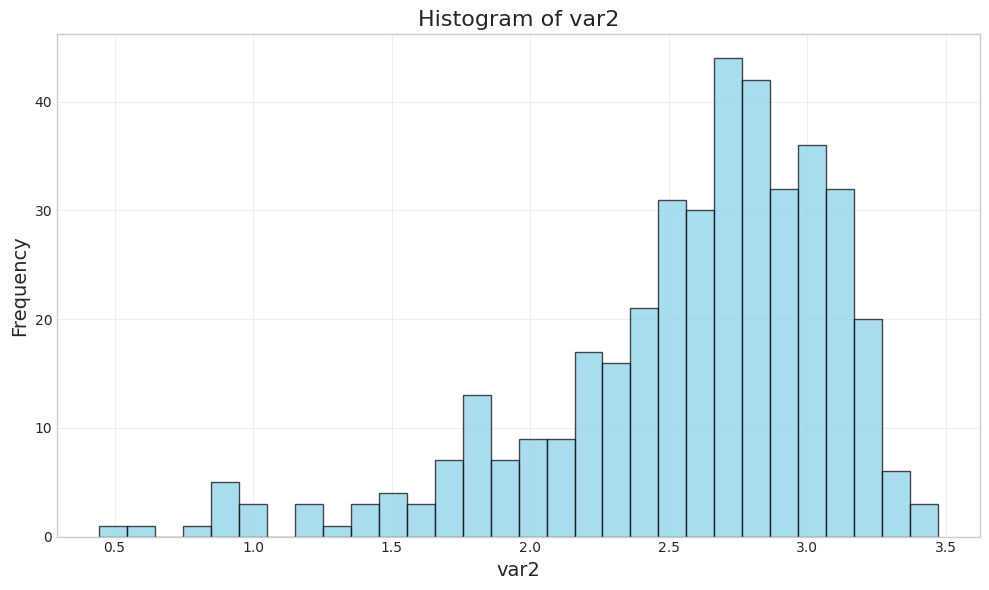

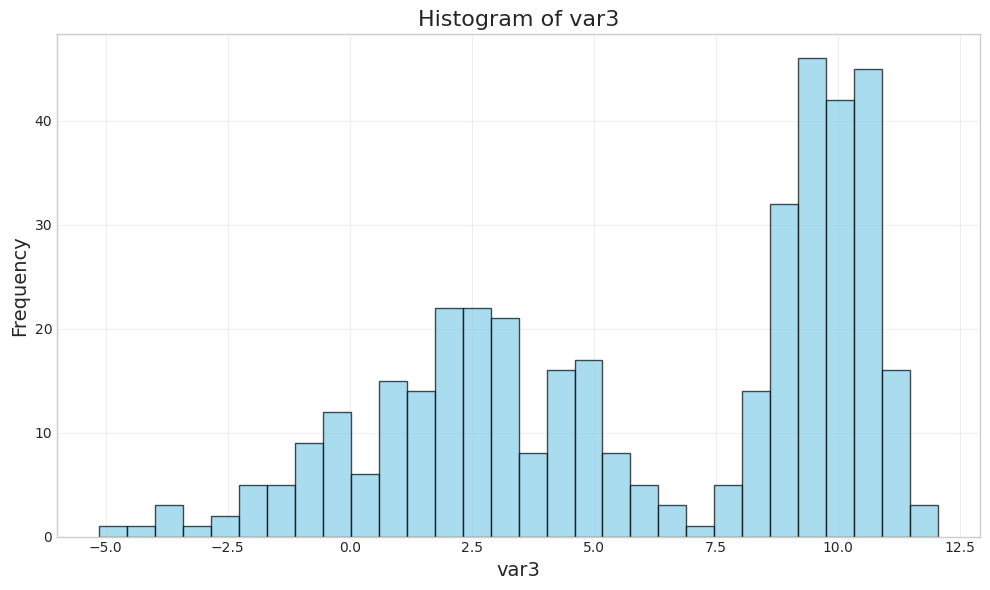

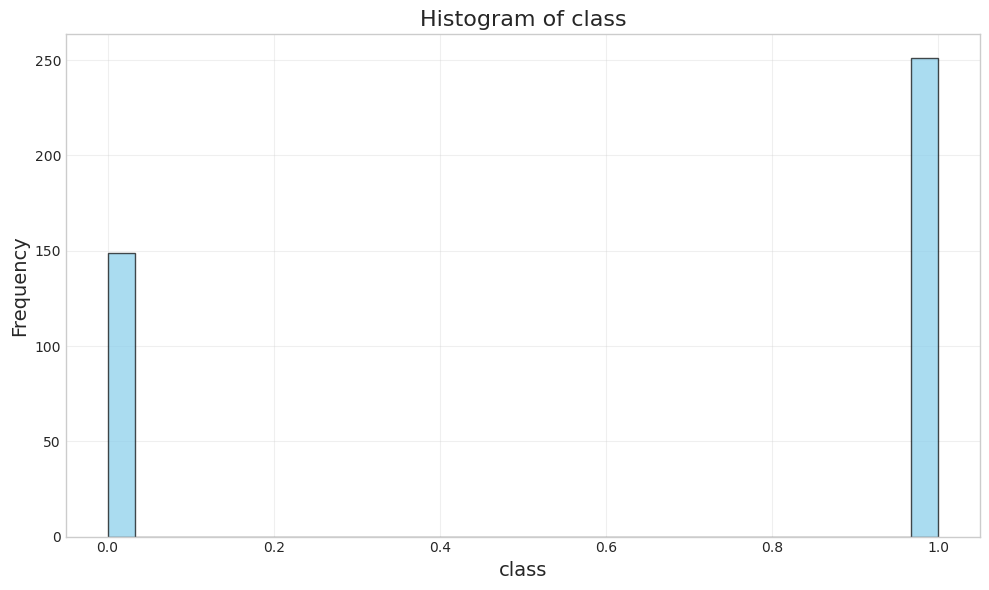

In [5]:
# Set Matplotlib style for consistency
plt.style.use('seaborn-whitegrid')

# Plot 1: Histograms for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

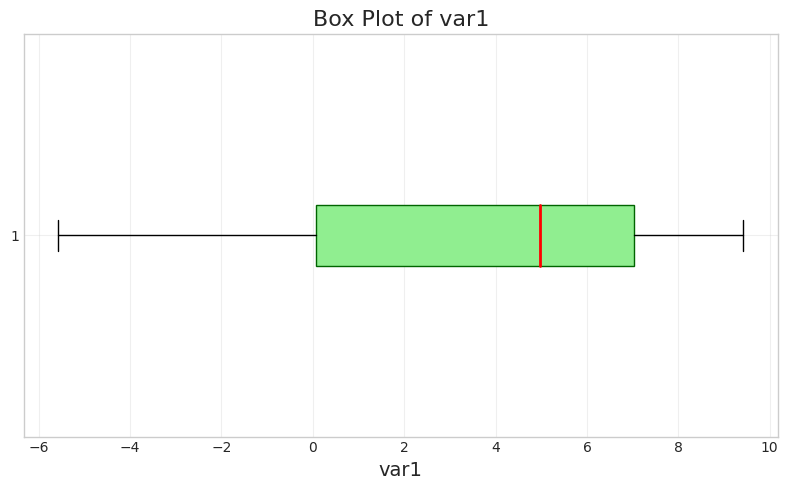

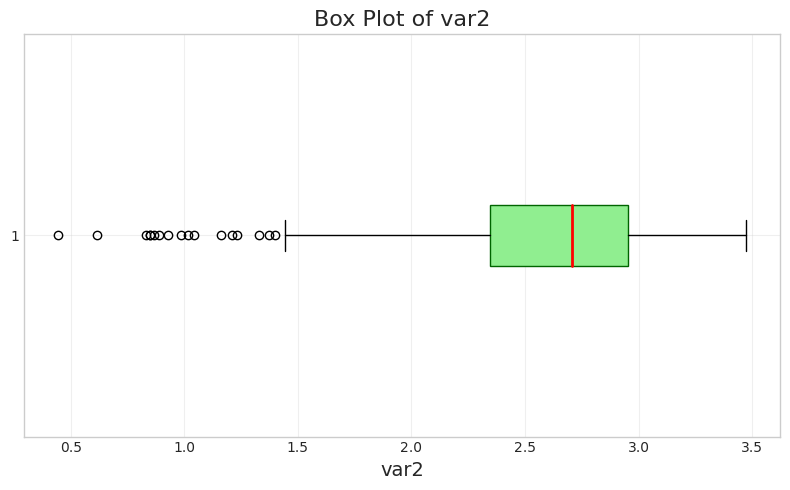

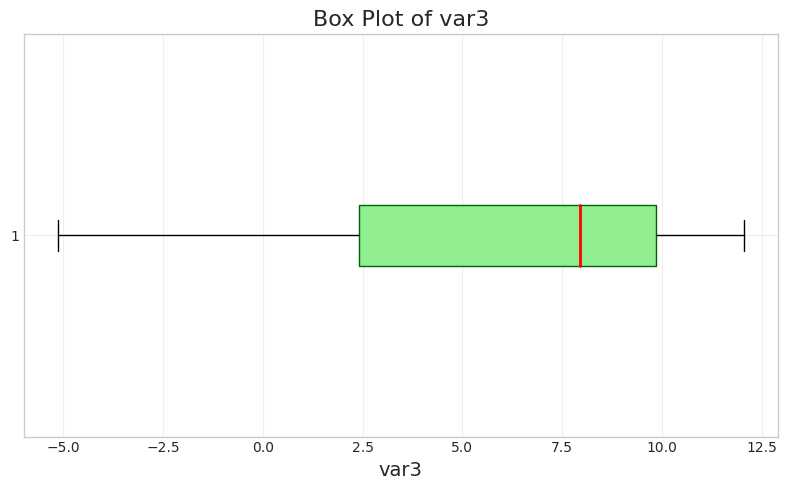

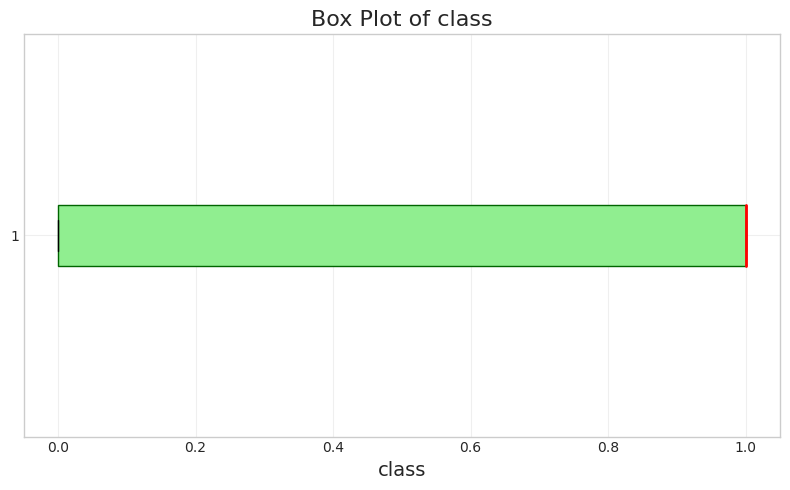

In [6]:
# Plot 2: Boxplots for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightgreen', color='darkgreen'),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f"Box Plot of {column}", fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


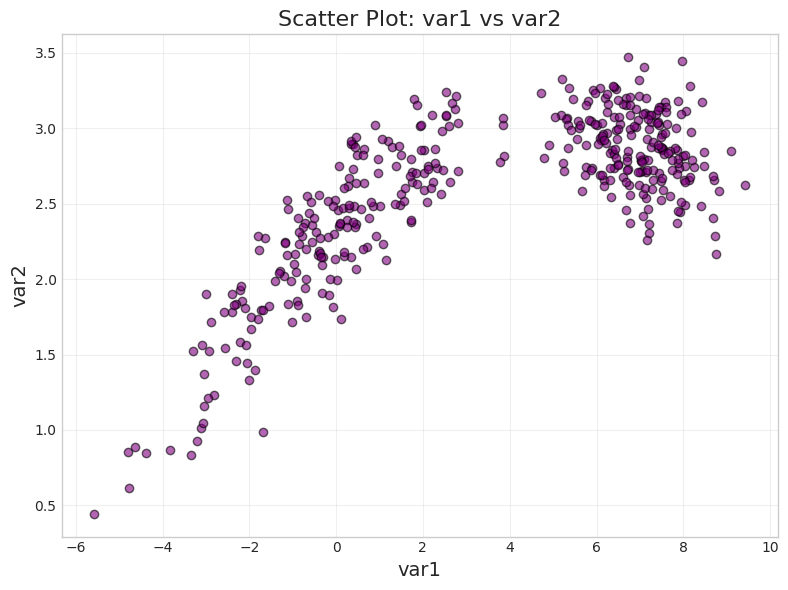

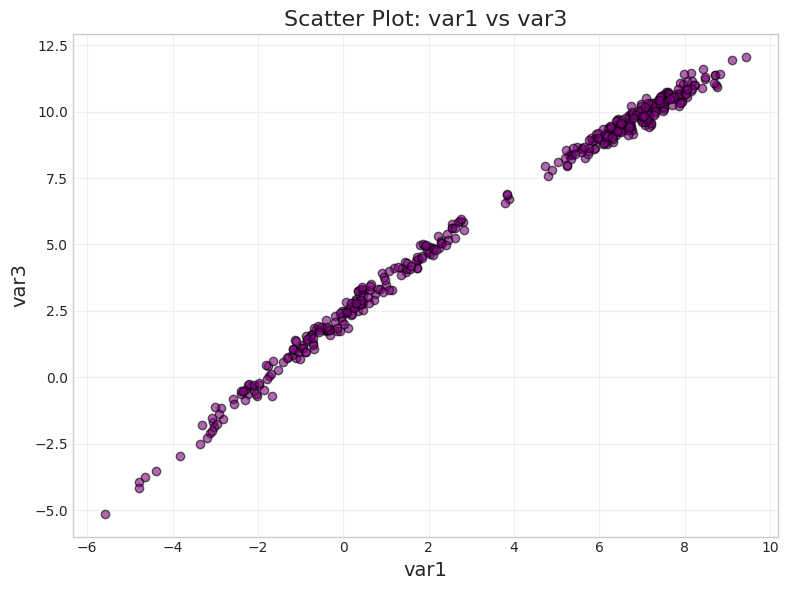

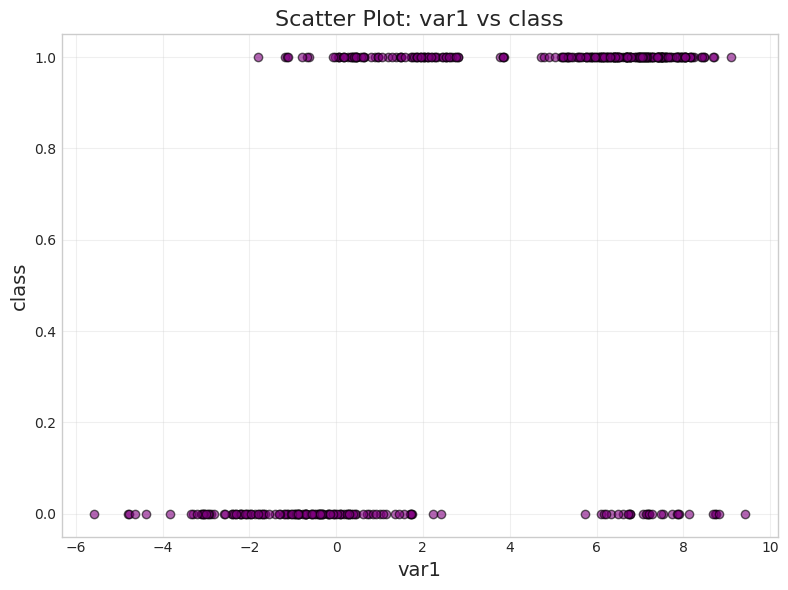

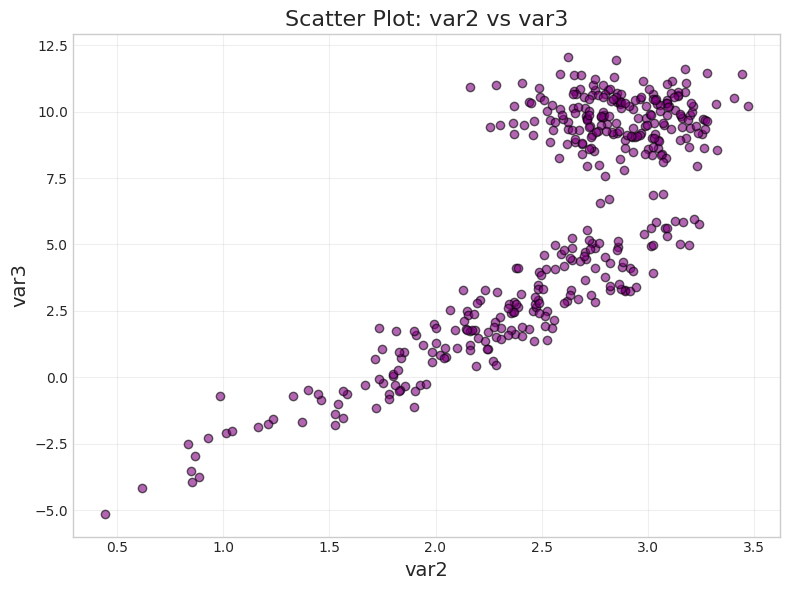

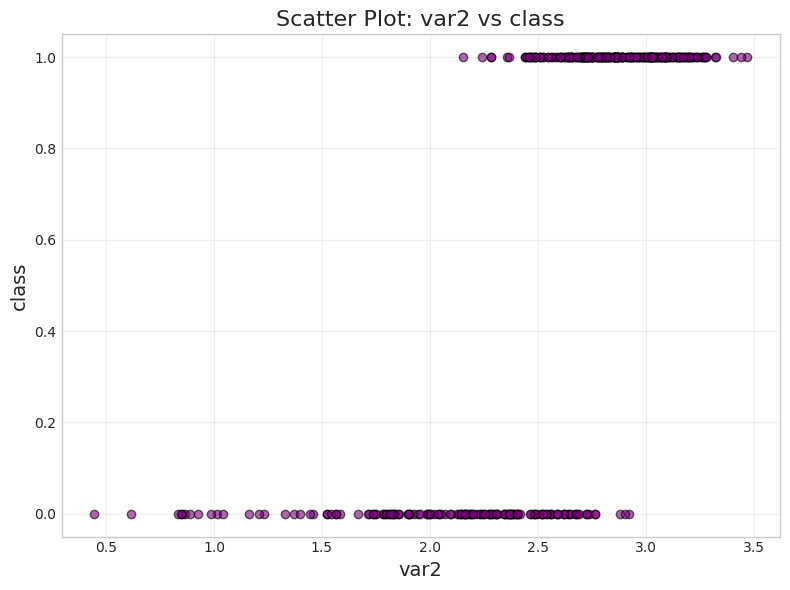

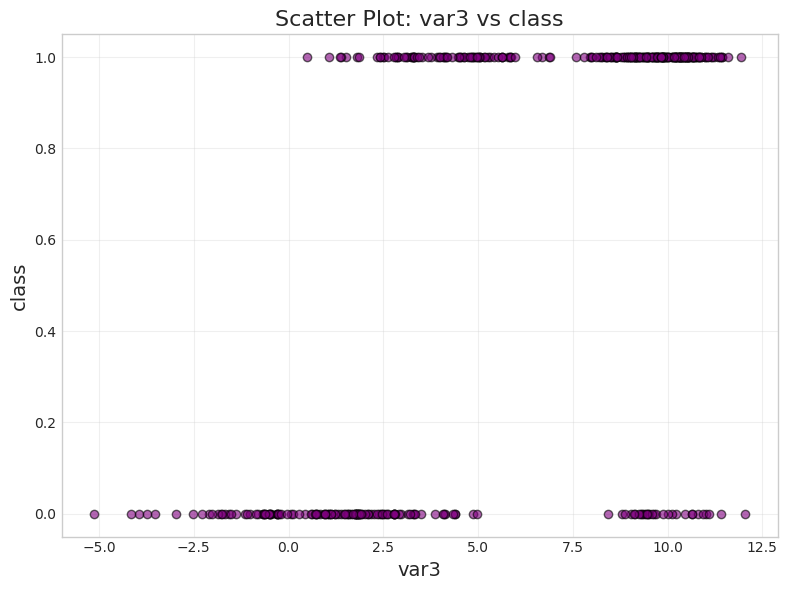

In [16]:
# Plot 3: Scatter plots for pairwise relationships
if len(numerical_columns) > 1:
    for i, col1 in enumerate(numerical_columns):
        for col2 in numerical_columns[i + 1:]:
            plt.figure(figsize=(8, 6))
            plt.scatter(data[col1], data[col2], alpha=0.6, color='purple', edgecolor='black')
            plt.title(f"Scatter Plot: {col1} vs {col2}", fontsize=16)
            plt.xlabel(col1, fontsize=14)
            plt.ylabel(col2, fontsize=14)
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()



In [17]:
# Plot 4: Bar plots for categorical columns
if len(categorical_columns) > 0:
    for column in categorical_columns:
        counts = data[column].value_counts()
        plt.figure(figsize=(10, 6))
        plt.bar(counts.index, counts.values, color='mediumpurple', alpha=0.8, edgecolor='black')
        plt.title(f"Bar Plot of {column}", fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.grid(alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("No categorical columns to plot.")



No categorical columns to plot.


In [18]:
# Plot 5: Line plot for date/time columns (if any)
if len(time_columns) > 0:
    for column in time_columns:
        if pd.api.types.is_datetime64_any_dtype(data[column]):
            plt.figure(figsize=(12, 6))
            data.set_index(column).plot(ax=plt.gca(), linewidth=2, alpha=0.8)
            plt.title(f"Line Plot of {column} Trends", fontsize=16)
            plt.ylabel("Values", fontsize=14)
            plt.grid(alpha=0.3)
            plt.tight_layout()
            plt.show()
else:
    print("No date/time columns to plot.")

No date/time columns to plot.
